In [1]:
import gym
import robo_gym
from robo_gym.wrappers.exception_handling import ExceptionHandling

import numpy as np

In [2]:
target_machine_ip = 'localhost' # or other machine 'xxx.xxx.xxx.xxx'

# initialize environment
env = gym.make('CubeRoomOnNavigationStack-v0', ip=target_machine_ip, gui=True)
env = ExceptionHandling(env)

env.reset(**{'new_room': True, 'new_agent_pose': True})

Starting new Robot Server | Tentative 1
Successfully started Robot Server at localhost:34981


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


{'occupancy_grid': array([-1, -1, -1, ..., -1, -1, -1], dtype=int16),
 'agent_pose': array([0., 0., 0.])}

In [3]:
state = env.reset(**{'new_room': False, 'new_agent_pose': True})
state

{'occupancy_grid': array([-1, -1, -1, ..., -1, -1, -1], dtype=int16),
 'agent_pose': array([0., 0., 0.])}

In [4]:
env.agent_pose

array([-3.15912938, -0.25402993, -2.65487933])

In [95]:
env.action_space.low, env.action_space.high

(array([ 0., -1., -1.], dtype=float32), array([1., 1., 1.], dtype=float32))

In [96]:
pose_low = env.observation_space['agent_pose'].low
pose_high = env.observation_space['agent_pose'].high
print(f"observation[agent_pose]: \n\tlow: {pose_low}\n\thigh: {pose_high}:")

observation[agent_pose]: 
	low: [ 0.        -3.1415927 -3.1415927]
	high: [      inf 3.1415927 3.1415927]:


In [9]:
action = [0.1,0,0]
state, _, _, _ = env.step(action)
state

Error occurred while calling the step function. Restarting Robot server ...
Killing Robot Server at localhost:34981 | Tentative 1
Killing Robot Server at localhost:34981 | Tentative 2
Killing Robot Server at localhost:34981 | Tentative 3
Killing Robot Server at localhost:34981 | Tentative 4
Killing Robot Server at localhost:34981 | Tentative 5
Killing Robot Server at localhost:34981 | Tentative 6
Killing Robot Server at localhost:34981 | Tentative 7
Killing Robot Server at localhost:34981 | Tentative 8
Killing Robot Server at localhost:34981 | Tentative 9
Killing Robot Server at localhost:34981 | Tentative 10
Killing Robot Server at localhost:34981 | Tentative 11
Killing Robot Server at localhost:34981 | Tentative 12
Killing Robot Server at localhost:34981 | Tentative 13
Killing Robot Server at localhost:34981 | Tentative 14
Killing Robot Server at localhost:34981 | Tentative 15
Killing Robot Server at localhost:34981 | Tentative 16
Killing Robot Server at localhost:34981 | Tentative 1

Killing Robot Server at localhost:34981 | Tentative 692
Killing Robot Server at localhost:34981 | Tentative 693
Killing Robot Server at localhost:34981 | Tentative 694
Killing Robot Server at localhost:34981 | Tentative 695
Killing Robot Server at localhost:34981 | Tentative 696
Killing Robot Server at localhost:34981 | Tentative 697
Killing Robot Server at localhost:34981 | Tentative 698
Killing Robot Server at localhost:34981 | Tentative 699
Killing Robot Server at localhost:34981 | Tentative 700
Killing Robot Server at localhost:34981 | Tentative 701
Killing Robot Server at localhost:34981 | Tentative 702
Killing Robot Server at localhost:34981 | Tentative 703
Killing Robot Server at localhost:34981 | Tentative 704
Killing Robot Server at localhost:34981 | Tentative 705
Killing Robot Server at localhost:34981 | Tentative 706
Killing Robot Server at localhost:34981 | Tentative 707
Killing Robot Server at localhost:34981 | Tentative 708
Killing Robot Server at localhost:34981 | Tentat

RuntimeError: Failed 5 tentatives of killing Robot Server

{-1: 61023, 0: 3892, 100: 621}
{0: 621, 128: 61023, 255: 3892}


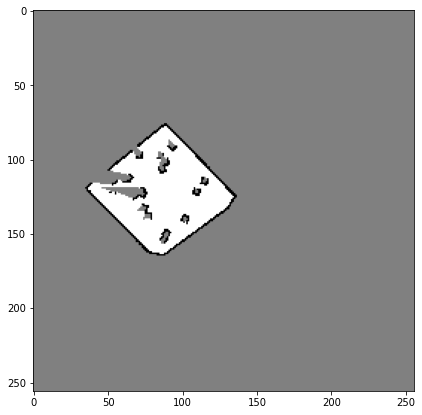

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 7,7

o = np.array(state['occupancy_grid'], dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

o[o == 0] = 255
o[o == 100] = 0
o[o == -1] = 128
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))
img = o.reshape((256,256)).T
plt.imshow(img, cmap='gray') 

(128, 128)


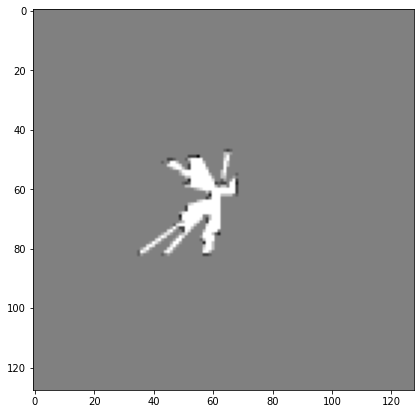

In [91]:
from skimage.transform import resize, rescale

resized = rescale(img, 0.5, anti_aliasing=False)
print(resized.shape)
plt.imshow(resized, cmap='gray')

{0: 61571, 255: 3965}


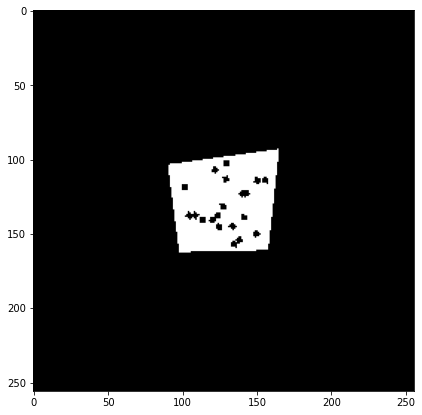

In [42]:
o = np.array(env.map_trueth, dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

img = o.reshape((256,256)).T
plt.imshow(img, cmap='gray') 